<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Compare-the-gradients" data-toc-modified-id="Compare-the-gradients-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Compare the gradients</a></span></li><li><span><a href="#Different-ways-to-compare" data-toc-modified-id="Different-ways-to-compare-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Different ways to compare</a></span><ul class="toc-item"><li><span><a href="#SigB-vs-Spores" data-toc-modified-id="SigB-vs-Spores-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>SigB vs Spores</a></span></li><li><span><a href="#spores-/-sigB" data-toc-modified-id="spores-/-sigB-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>spores / sigB</a></span></li><li><span><a href="#Sig-B-/-spores" data-toc-modified-id="Sig-B-/-spores-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sig B / spores</a></span></li><li><span><a href="#Rainbow-colors" data-toc-modified-id="Rainbow-colors-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Rainbow colors</a></span></li><li><span><a href="#Slicing-and-dicing" data-toc-modified-id="Slicing-and-dicing-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Slicing and dicing</a></span></li></ul></li></ul></div>

In [3]:
import os.path
import filedb
import matplotlib.pyplot as plt
import figure_util
from figure_util import dpi
import pandas as pd
from scipy.interpolate import interp1d

In [4]:
import sys
sys.path += ["/Users/npm33/bf_pulse/"]

In [6]:
sys.path = sys.path[3:]

In [7]:
sys.path

['/Users/npm33/bf_pulse/notebooks/spore_vs_sigb',
 '/Users/npm33/anaconda3/envs/py35/lib/python35.zip',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5/plat-darwin',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5/lib-dynload',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5/site-packages',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5/site-packages/aeosa',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg',
 '/Users/npm33/anaconda3/envs/py35/lib/python3.5/site-packages/IPython/extensions',
 '/Users/npm33/.ipython',
 '/Users/npm33/bf_pulse/']

In [8]:
import figures.figure_allspore_2xqp_combo.subfig_density_gradient as subfig_density_gradient      

In [9]:
def get_spore_grad(spec):
    base = "../../datasets/LSM700_63x_sspb_giant/"
    datadir = os.path.join(base, "kd_spore_cell")
    file_df = filedb.get_filedb(base + "file_list.tsv")
    spore_distances, spore_mean, _, _ = subfig_density_gradient.get_plot_lines(file_df, datadir, spec, "spore") 
    return spore_distances, spore_mean

In [10]:
def get_sigb_grad(species):
    basedir = "../../datasets/LSM700_63x_sigb/gradients"
    normalisation = [("unnormed", "Unormalised YFP (AU)"), 
                        ("gradnorm",  "RFP max gradient normalized") ]
    norm = normalisation[1][0]
    error = "sem"
    time = 48

    if error == "sem":
        ds_tag = "indiv"
        main_line = "mean"
    elif "quartile" in error:
        ds_tag = "error"
        main_line = "median"
    else:
        ds_tag = "error"
        main_line = "mean"
    
    df = pd.read_csv(os.path.join(basedir,"{3}_{0}_{1}_{2}.tsv".format(norm, species, time, ds_tag)), sep="\t")
    return df["distance"], df[main_line]



In [11]:
data = {"wt": {"strain_sb": "jlb021", "strain_spores":"JLB077"}, 
        "2xQP": {"strain_sb": "jlb095", "strain_spores": "JLB117"}} 

In [12]:
for pheno in data.keys():
    print(pheno)
    print(data[pheno]["strain_spores"])
    spore_dist, spore_mean = get_spore_grad(data[pheno]["strain_spores"])
    # cut off end cos sigb doesnt go that far
    spore_dist, spore_mean = spore_dist[:-3], spore_mean[:-3]
    data[pheno]["spore_dist"] = spore_dist
    data[pheno]["spore_mean"] = spore_mean
    
    sigb_dist, sigb_mean = get_sigb_grad(data[pheno]["strain_sb"])
    data[pheno]["sbact_dist"] = sigb_dist 
    data[pheno]["sbact_mean"] = sigb_mean 
    
    sigb_func = interp1d(sigb_dist, sigb_mean, kind="linear")
    sigb_mean_inter = sigb_func(spore_dist)
    data[pheno]["sb_dist"] = spore_dist 
    data[pheno]["sb_mean"] = sigb_mean_inter 


 

2xQP
JLB117
strain JLB117
individual files N= 12
wt
JLB077
strain JLB077
individual files N= 12


# Compare the gradients

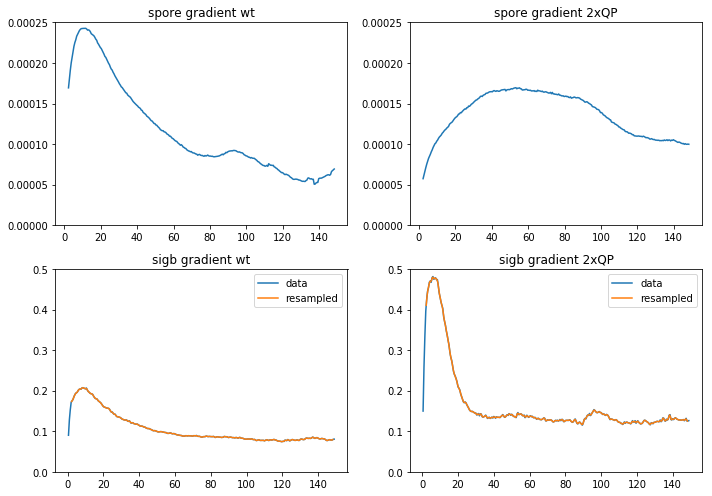

In [13]:
fig, ax = plt.subplots(2,2)


for s, pheno in enumerate(["wt", "2xQP"]):
    
    ax[0,s].plot(data[pheno]["spore_dist"], data[pheno]["spore_mean"])
    ax[0,s].set_title("spore gradient " + pheno)
    ax[0,s].set_ylim(0, 0.00025)
    
    ax[1,s].plot(data[pheno]["sbact_dist"], data[pheno]["sbact_mean"], label="data")
    ax[1,s].set_title("sigb gradient " + pheno)
    ax[1,s].set_ylim(0, 0.5)
    ax[1,s].plot(data[pheno]["sb_dist"], data[pheno]["sb_mean"], label="resampled")
    ax[1,s].legend()

fig.set_size_inches(10, 7)
fig.tight_layout()


# Different ways to compare 

## SigB vs Spores 

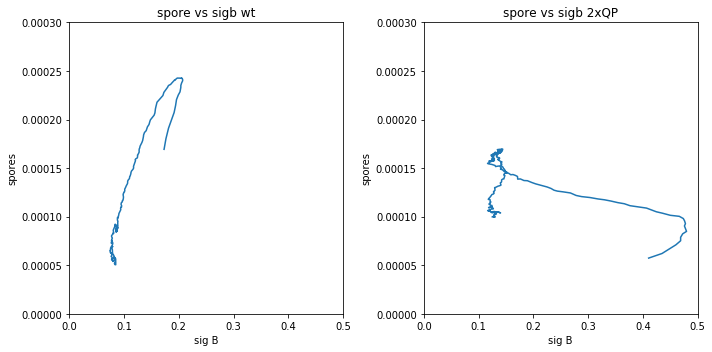

In [14]:
fig, ax = plt.subplots(1,2)


for s, pheno in enumerate(["wt", "2xQP"]):
    
    ax[s].plot(data[pheno]["sb_mean"], data[pheno]["spore_mean"])
    ax[s].set_title("spore vs sigb " + pheno)
    ax[s].set_ylabel("spores")
    ax[s].set_xlabel("sig B")
    ax[s].set_xlim(0, 0.5)
    ax[s].set_ylim(0, 0.0003)


fig.set_size_inches(10, 5)
fig.tight_layout()


## spores / sigB 

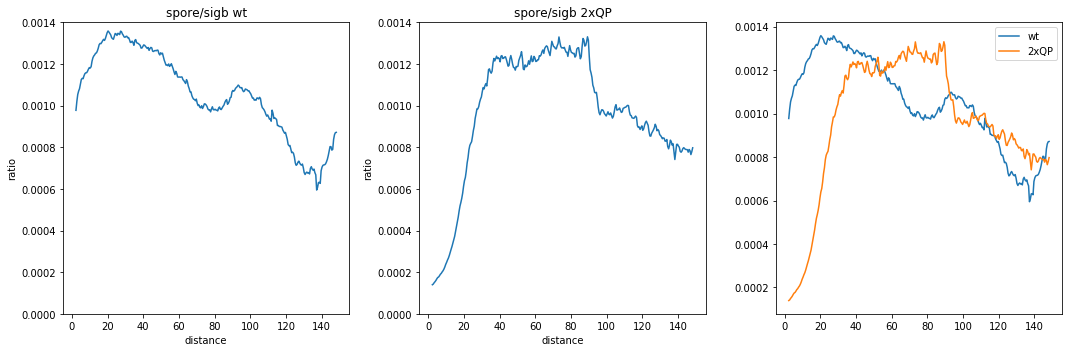

In [15]:
fig, ax = plt.subplots(1,3)

for s, pheno in enumerate(["wt", "2xQP"]):
    
    ax[s].plot(data[pheno]["sb_dist"], data[pheno]["spore_mean"]/data[pheno]["sb_mean"])
    ax[s].set_title("spore/sigb " + pheno)
    ax[s].set_ylabel("ratio")
    ax[s].set_xlabel("distance")
    #ax[s].set_xlim(0, 0.5)
    ax[s].set_ylim(0, 0.0014)
    ax[2].plot(data[pheno]["sb_dist"], data[pheno]["spore_mean"]/data[pheno]["sb_mean"], label=pheno)
ax[2].legend()

fig.set_size_inches(15, 5)
fig.tight_layout()


## Sig B / spores

This looks pretty great!, at SigB we dont see any interference but in 2xQP, its massive.

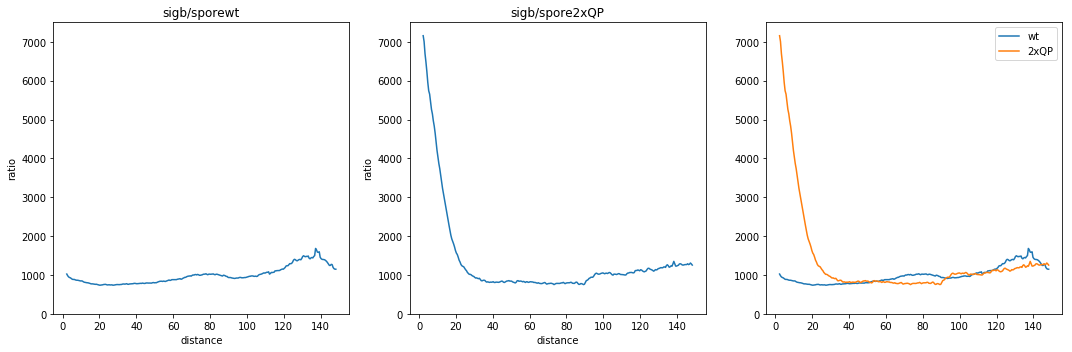

In [20]:
fig, ax = plt.subplots(1,3)


for s, pheno in enumerate(["wt", "2xQP"]):
    
    ax[s].plot(data[pheno]["sb_dist"],data[pheno]["sb_mean"]/ data[pheno]["spore_mean"])
    ax[s].set_title("sigb/spore" + pheno)
    ax[s].set_ylabel("ratio")
    ax[s].set_xlabel("distance")
    #ax[s].set_xlim(0, 0.5)
    ax[2].plot(data[pheno]["sb_dist"], data[pheno]["sb_mean"]/data[pheno]["spore_mean"], label=pheno)
ax[2].legend()
for a in ax:
    a.set_ylim(0, 7500)

fig.set_size_inches(15, 5)
fig.tight_layout()

## Rainbow colors

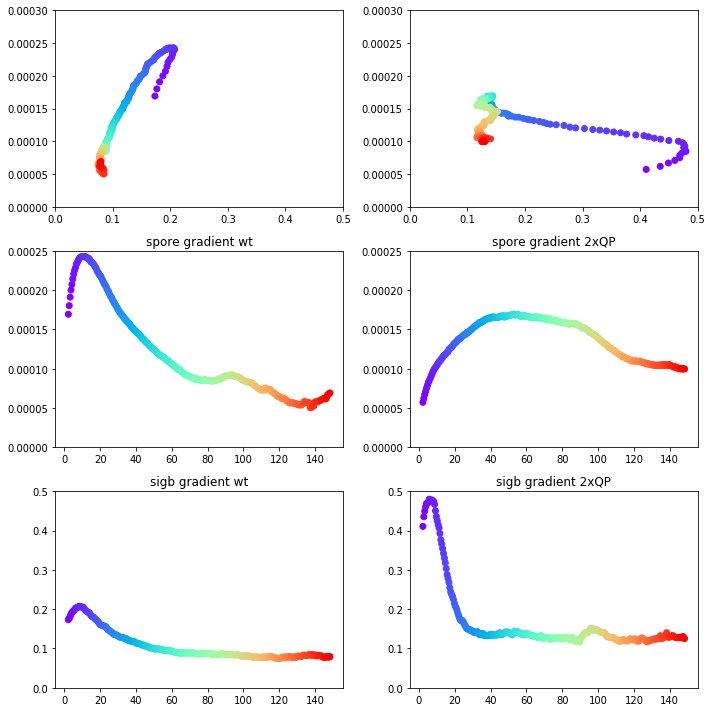

In [72]:
fig, ax = plt.subplots(3,2)

style = {"c":data[pheno]["spore_dist"],
             "cmap":plt.cm.rainbow }

for s, pheno in enumerate(["wt", "2xQP"]):
    
    ax[0,s].scatter(data[pheno]["sb_mean"], data[pheno]["spore_mean"], **style)
    ax[0,s].set_xlim(0, 0.5)
    ax[0,s].set_ylim(0, 0.0003)

    ax[1,s].scatter(data[pheno]["spore_dist"], data[pheno]["spore_mean"], **style)
    ax[1,s].set_title("spore gradient " + pheno)
    ax[1,s].set_ylim(0, 0.00025)
    
    ax[2,s].set_title("sigb gradient " + pheno)
    ax[2,s].set_ylim(0, 0.5)
    ax[2,s].scatter(data[pheno]["sb_dist"], data[pheno]["sb_mean"], **style)

fig.set_size_inches(10, 10)
fig.tight_layout()


## Slicing and dicing

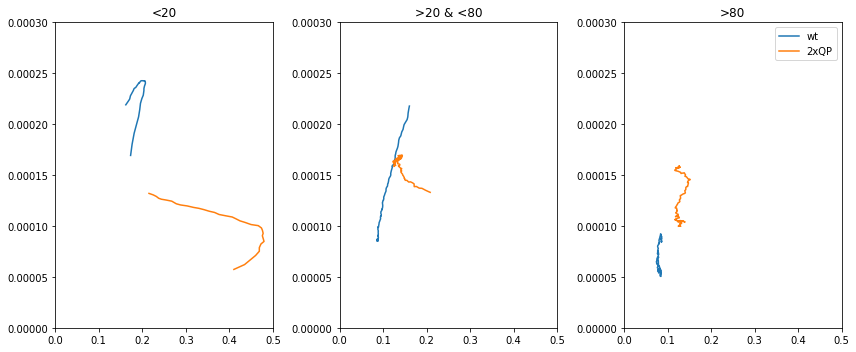

In [22]:

slice_n_dice = [("<20", lambda x: x<20),
                (">20 & <80", lambda x: (x>20) & (x<80)),
                (">80", lambda x: x > 80)]

fig, ax = plt.subplots(1,len(slice_n_dice))

for c, (region, mask_func) in enumerate(slice_n_dice): 
    for s, pheno in enumerate(["wt", "2xQP"]):
        slice_dist = mask_func(data[pheno]["spore_dist"])
        sigb = data[pheno]["sb_mean"][slice_dist]
        spore = data[pheno]["spore_mean"][slice_dist]

        ax[c].plot(sigb, spore, label=pheno) 
        ax[c].set_xlim(0, 0.5)
        ax[c].set_ylim(0, 0.0003)
        ax[c].set_title(region)
ax[-1].legend()

fig.set_size_inches(12, 5)
fig.tight_layout()
